# 3. 월별 부동산거래와 인구

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3-1. 가구별 비교
- 월별 부동산 거래 출처 : https://www.reb.or.kr/r-one/statistics/statisticsViewer.do?menuId=HOUSE_21211
- 기간 : 2011년 1월 - 2021년 11월
- 단위: 동(호) 수 -  단독, 다가구(동수) + 아파트, 연립, 다세대(호수)
- 가설 : 부동산거래량과 세대별 가구수는 관련이 있다.

In [ ]:
gen1 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/황희원/데이터/1인세대.csv의 사본',  header=0, thousands=',')
gen1.rename(columns={'Unnamed: 0':'시기'},inplace=True)

gen11=gen1.set_index('시기')
gen11.head()

,서울특별시,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,서울특별시 노원구,서울특별시 은평구,서울특별시 서대문구,서울특별시 마포구,서울특별시 양천구,서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,서울특별시 영등포구,서울특별시 동작구,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구
시기,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01,1535816,35771,28616,51822,49133,63753,65350,63916,73753,50725,41610,62880,67155,54491,69612,51387,71751,58260,40419,66739,62648,116977,56575,88101,83879,60493
2011-02,1538029,35793,28685,51759,49185,63875,65638,64075,73897,50883,41648,62941,67264,54637,69736,51267,71829,58241,40556,66982,62882,117500,56547,87914,83738,60557
2011-03,1535811,35727,28586,51713,49068,63847,65588,64099,73856,50899,41473,62771,67239,54461,69668,50978,71700,58194,40628,67136,62612,117639,56321,87584,83506,60518
2011-04,1534477,35681,28571,51613,48919,63799,65539,64081,73780,50954,41424,62593,67239,54264,69600,50731,71750,58148,40687,67251,62571,117565,56204,87536,83486,60491
2011-05,1530582,35676,28495,51481,48835,63618,65334,64070,73504,50807,41295,62338,66994,54109,69439,50472,71570,57931,40622,67298,62470,117308,55998,87456,83168,60294


In [ ]:
a = gen11.columns[0].strip()

In [ ]:
gen11.rename(columns={'서울특별시  ':a}, inplace=True)

In [ ]:
gen11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 2011-01 to 2021-12
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   서울특별시        132 non-null    int64
 1   서울특별시 종로구    132 non-null    int64
 2   서울특별시 중구     132 non-null    int64
 3   서울특별시 용산구    132 non-null    int64
 4   서울특별시 성동구    132 non-null    int64
 5   서울특별시 광진구    132 non-null    int64
 6   서울특별시 동대문구   132 non-null    int64
 7   서울특별시 중랑구    132 non-null    int64
 8   서울특별시 성북구    132 non-null    int64
 9   서울특별시 강북구    132 non-null    int64
 10  서울특별시 도봉구    132 non-null    int64
 11  서울특별시 노원구    132 non-null    int64
 12  서울특별시 은평구    132 non-null    int64
 13  서울특별시 서대문구   132 non-null    int64
 14  서울특별시 마포구    132 non-null    int64
 15  서울특별시 양천구    132 non-null    int64
 16  서울특별시 강서구    132 non-null    int64
 17  서울특별시 구로구    132 non-null    int64
 18  서울특별시 금천구    132 non-null    int64
 19  서울특별시 영등포구   132 non-null    int64
 20  서울특별시

2인가구

In [ ]:
gen2 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/황희원/데이터/2인세대.csv의 사본',  header=0, thousands=',')
gen2.rename(columns={'Unnamed: 0':'시기'},inplace=True)

gen21=gen2.set_index('시기')
gen21.head()

,서울특별시,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,서울특별시 노원구,서울특별시 은평구,서울특별시 서대문구,서울특별시 마포구,서울특별시 양천구,서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,서울특별시 영등포구,서울특별시 동작구,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구
시기,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01,778517,13456,11249,21164,24598,28341,28647,33416,37720,28753,26666,42760,38726,26289,32708,31028,43068,32295,18831,31917,32478,43842,30611,40239,46144,33571
2011-02,778801,13462,11229,21230,24567,28341,28658,33382,37785,28768,26692,42716,38775,26176,32768,31009,43108,32364,18859,31968,32456,43858,30606,40193,46178,33653
2011-03,777519,13388,11281,21204,24480,28283,28604,33241,37704,28737,26707,42491,38823,26030,32780,31061,43123,32318,18834,31971,32355,43820,30340,40151,46105,33688
2011-04,777625,13411,11267,21230,24427,28271,28681,33262,37630,28684,26711,42513,38953,25898,32734,31087,43154,32233,18874,31977,32415,43807,30284,40159,46150,33813
2011-05,778185,13375,11261,21246,24363,28320,28756,33312,37640,28727,26763,42591,38990,25833,32757,31092,43196,32204,18931,31946,32368,43924,30251,40242,46273,33824


In [ ]:
a = gen21.columns[0].strip()

In [ ]:
gen21.rename(columns={'서울특별시  ':a}, inplace=True)

In [ ]:
gen21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 2011-01 to 2021-12
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   서울특별시        132 non-null    int64
 1   서울특별시 종로구    132 non-null    int64
 2   서울특별시 중구     132 non-null    int64
 3   서울특별시 용산구    132 non-null    int64
 4   서울특별시 성동구    132 non-null    int64
 5   서울특별시 광진구    132 non-null    int64
 6   서울특별시 동대문구   132 non-null    int64
 7   서울특별시 중랑구    132 non-null    int64
 8   서울특별시 성북구    132 non-null    int64
 9   서울특별시 강북구    132 non-null    int64
 10  서울특별시 도봉구    132 non-null    int64
 11  서울특별시 노원구    132 non-null    int64
 12  서울특별시 은평구    132 non-null    int64
 13  서울특별시 서대문구   132 non-null    int64
 14  서울특별시 마포구    132 non-null    int64
 15  서울특별시 양천구    132 non-null    int64
 16  서울특별시 강서구    132 non-null    int64
 17  서울특별시 구로구    132 non-null    int64
 18  서울특별시 금천구    132 non-null    int64
 19  서울특별시 영등포구   132 non-null    int64
 20  서울특별시

3인가구

In [ ]:
gen3 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/황희원/데이터/3인세대.csv의 사본',  header=0, thousands=',')
gen3.rename(columns={'Unnamed: 0':'시기'},inplace=True)

gen31=gen3.set_index('시기')
gen31.head()

,서울특별시,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,서울특별시 노원구,서울특별시 은평구,서울특별시 서대문구,서울특별시 마포구,서울특별시 양천구,서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,서울특별시 영등포구,서울특별시 동작구,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구
시기,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01,774468,11688,9441,17896,23087,27384,26925,32915,37380,27523,29238,47086,38160,24080,28995,36704,45227,32468,18224,30268,30033,37344,32800,40678,51369,37555
2011-02,774651,11696,9437,17856,23104,27395,26978,32957,37403,27527,29261,46998,38196,24033,28992,36734,45196,32376,18180,30234,30009,37380,32826,40698,51402,37783
2011-03,774219,11663,9401,17938,23031,27367,26930,32946,37336,27495,29270,46915,38178,23893,29025,36688,45089,32330,18250,30185,30012,37377,32838,40601,51494,37967
2011-04,774010,11677,9401,17977,22954,27370,26898,32951,37332,27553,29266,46855,38240,23822,29076,36693,45025,32346,18254,30098,29994,37358,32792,40527,51518,38033
2011-05,773345,11672,9402,17990,22920,27316,26838,32910,37282,27541,29247,46814,38294,23752,29036,36735,44982,32327,18244,30001,30017,37269,32733,40544,51457,38022


In [ ]:
a = gen31.columns[0].strip()

In [ ]:
gen31.rename(columns={'서울특별시  ':a}, inplace=True)

In [ ]:
gen31.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 2011-01 to 2021-12
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   서울특별시        132 non-null    int64
 1   서울특별시 종로구    132 non-null    int64
 2   서울특별시 중구     132 non-null    int64
 3   서울특별시 용산구    132 non-null    int64
 4   서울특별시 성동구    132 non-null    int64
 5   서울특별시 광진구    132 non-null    int64
 6   서울특별시 동대문구   132 non-null    int64
 7   서울특별시 중랑구    132 non-null    int64
 8   서울특별시 성북구    132 non-null    int64
 9   서울특별시 강북구    132 non-null    int64
 10  서울특별시 도봉구    132 non-null    int64
 11  서울특별시 노원구    132 non-null    int64
 12  서울특별시 은평구    132 non-null    int64
 13  서울특별시 서대문구   132 non-null    int64
 14  서울특별시 마포구    132 non-null    int64
 15  서울특별시 양천구    132 non-null    int64
 16  서울특별시 강서구    132 non-null    int64
 17  서울특별시 구로구    132 non-null    int64
 18  서울특별시 금천구    132 non-null    int64
 19  서울특별시 영등포구   132 non-null    int64
 20  서울특별시

4인가구

In [ ]:
gen4 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/황희원/데이터/4인세대.csv의 사본',  header=0, thousands=',')
gen4.rename(columns={'Unnamed: 0':'시기'},inplace=True)

gen41=gen4.set_index('시기')
gen41.head()

,서울특별시,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,서울특별시 노원구,서울특별시 은평구,서울특별시 서대문구,서울특별시 마포구,서울특별시 양천구,서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,서울특별시 영등포구,서울특별시 동작구,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구
시기,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01,864689,12092,8926,16722,24511,30793,28044,34648,39748,26632,33017,58569,39442,25150,29824,50099,49828,35797,19483,32518,32183,37500,39348,50818,64009,44988
2011-02,864396,12105,8943,16775,24392,30719,27985,34558,39789,26568,32881,58538,39593,25013,29822,50097,49808,35733,19488,32404,32158,37377,39453,50916,64114,45167
2011-03,864763,12078,8935,16875,24399,30726,28074,34620,39901,26651,32890,58486,39738,24995,29929,49973,49779,35695,19462,32392,32227,37326,39398,50849,64040,45325
2011-04,864034,12014,8935,16888,24343,30660,28083,34596,39871,26600,32908,58357,39740,24945,29989,49886,49746,35682,19407,32372,32314,37257,39346,50789,64013,45293
2011-05,863770,11989,8941,17073,24294,30668,28077,34523,39871,26609,32907,58284,39689,24870,29989,49911,49680,35694,19279,32354,32335,37197,39344,50850,63989,45353


In [ ]:
a = gen41.columns[0].strip()

In [ ]:
gen41.rename(columns={'서울특별시  ':a}, inplace=True)

In [ ]:
gen41.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 2011-01 to 2021-12
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   서울특별시        132 non-null    int64
 1   서울특별시 종로구    132 non-null    int64
 2   서울특별시 중구     132 non-null    int64
 3   서울특별시 용산구    132 non-null    int64
 4   서울특별시 성동구    132 non-null    int64
 5   서울특별시 광진구    132 non-null    int64
 6   서울특별시 동대문구   132 non-null    int64
 7   서울특별시 중랑구    132 non-null    int64
 8   서울특별시 성북구    132 non-null    int64
 9   서울특별시 강북구    132 non-null    int64
 10  서울특별시 도봉구    132 non-null    int64
 11  서울특별시 노원구    132 non-null    int64
 12  서울특별시 은평구    132 non-null    int64
 13  서울특별시 서대문구   132 non-null    int64
 14  서울특별시 마포구    132 non-null    int64
 15  서울특별시 양천구    132 non-null    int64
 16  서울특별시 강서구    132 non-null    int64
 17  서울특별시 구로구    132 non-null    int64
 18  서울특별시 금천구    132 non-null    int64
 19  서울특별시 영등포구   132 non-null    int64
 20  서울특별시

In [ ]:
buy = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/황희원/데이터/주택거래_월별.csv')

buy.head()

,행정구역,2011년 01월,2011년 02월,2011년 03월,2011년 04월,2011년 05월,2011년 06월,2011년 07월,2011년 08월,2011년 09월,2011년 10월,2011년 11월,2011년 12월,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,2012년 07월,2012년 08월,2012년 09월,2012년 10월,2012년 11월,2012년 12월,2013년 01월,2013년 02월,2013년 03월,2013년 04월,2013년 05월,2013년 06월,2013년 07월,2013년 08월,2013년 09월,2013년 10월,2013년 11월,2013년 12월,2014년 01월,2014년 02월,2014년 03월,...,2018년 08월,2018년 09월,2018년 10월,2018년 11월,2018년 12월,2019년 01월,2019년 02월,2019년 03월,2019년 04월,2019년 05월,2019년 06월,2019년 07월,2019년 08월,2019년 09월,2019년 10월,2019년 11월,2019년 12월,2020년 01월,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월,2020년 12월,2021년 01월,2021년 02월,2021년 03월,2021년 04월,2021년 05월,2021년 06월,2021년 07월,2021년 08월,2021년 09월,2021년 10월,2021년 11월
0,서울특별시,10482,11579,15373,13350,11780,11124,9702,10824,10919,11369,10636,14458,5256,7973,9865,10353,10051,8889,8086,6547,5728,10548,12194,16604,6091,6805,11163,13570,15307,21231,8483,9174,10479,16072,15425,16968,12512,15354,18905,...,21273,26088,27127,15821,13603,13452,9027,12206,12897,13581,17434,20486,20565,17419,21670,23188,28973,25962,25188,24483,14963,17361,25543,37221,22099,20820,18036,18051,24168,22088,17700,17132,22519,19519,17117,15921,14101,12808,11121,11409
1,서울특별시 종로구,145,170,201,180,200,186,168,156,173,158,165,227,78,114,103,163,167,138,145,130,83,179,232,253,102,132,141,209,231,383,264,172,186,205,167,202,200,204,246,...,195,270,265,185,187,169,148,195,219,177,163,254,202,161,194,263,445,356,299,270,173,206,273,500,315,198,184,214,296,182,289,227,291,303,209,229,187,209,232,189
2,서울특별시 중구,250,148,179,156,107,113,125,118,134,136,270,167,436,101,333,364,203,125,111,123,72,102,145,173,90,65,123,154,192,270,105,91,103,192,182,178,135,202,226,...,201,208,275,297,177,165,110,128,147,162,262,192,168,125,193,316,349,317,251,185,116,139,247,452,432,550,223,236,251,177,184,129,243,237,165,369,214,139,125,78
3,서울특별시 용산구,169,200,291,355,324,244,180,190,196,185,216,371,106,115,200,153,175,201,159,111,94,188,157,335,145,159,264,284,389,441,161,135,168,286,225,282,354,579,651,...,549,630,602,403,653,238,179,262,407,371,438,484,489,395,453,557,890,958,760,461,461,1059,598,1030,509,362,335,484,605,412,438,395,770,495,416,407,426,379,280,280
4,서울특별시 성동구,288,368,488,339,270,234,210,294,229,295,256,366,122,206,227,283,246,233,205,175,153,237,247,430,175,255,345,427,412,593,166,221,295,437,425,374,321,429,582,...,489,735,734,296,283,152,135,171,230,192,644,441,644,556,464,717,957,596,549,465,280,241,542,1808,520,375,196,429,643,365,387,762,300,407,259,281,262,248,257,173


In [ ]:
buy.index

RangeIndex(start=0, stop=26, step=1)

In [ ]:
buy.columns

Index(['행정구역', '2011년 01월', '2011년 02월', '2011년 03월', '2011년 04월', '2011년 05월',
       '2011년 06월', '2011년 07월', '2011년 08월', '2011년 09월',
       ...
       '2021년 02월', '2021년 03월', '2021년 04월', '2021년 05월', '2021년 06월',
       '2021년 07월', '2021년 08월', '2021년 09월', '2021년 10월', '2021년 11월'],
      dtype='object', length=132)

In [ ]:
buy.set_index('행정구역', inplace=True)
buy.index

Index(['서울특별시', '서울특별시 종로구', '서울특별시 중구', '서울특별시 용산구', '서울특별시 성동구', '서울특별시 광진구',
       '서울특별시 동대문구', '서울특별시 중랑구', '서울특별시 성북구', '서울특별시 강북구', '서울특별시 도봉구',
       '서울특별시 노원구', '서울특별시 은평구', '서울특별시 서대문구', '서울특별시 마포구', '서울특별시 양천구',
       '서울특별시 강서구', '서울특별시 구로구', '서울특별시 금천구', '서울특별시 영등포구', '서울특별시 동작구',
       '서울특별시 관악구', '서울특별시 서초구', '서울특별시 강남구', '서울특별시 송파구', '서울특별시 강동구'],
      dtype='object', name='행정구역')

In [ ]:
buy.T.head()

행정구역,서울특별시,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,서울특별시 노원구,서울특별시 은평구,서울특별시 서대문구,서울특별시 마포구,서울특별시 양천구,서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,서울특별시 영등포구,서울특별시 동작구,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구
2011년 01월,10482,145,250,169,288,291,339,391,559,315,368,644,698,360,520,493,526,443,157,329,527,352,577,628,682,431
2011년 02월,11579,170,148,200,368,296,399,360,632,279,456,710,777,413,733,511,724,536,203,366,509,441,477,631,657,583
2011년 03월,15373,201,179,291,488,467,509,657,816,489,625,878,1094,496,829,685,990,680,272,495,622,596,548,667,925,874
2011년 04월,13350,180,156,355,339,408,422,518,689,468,558,667,1062,456,555,635,824,636,267,392,562,501,501,697,789,713
2011년 05월,11780,200,107,324,270,347,379,428,526,419,493,572,978,478,410,585,772,452,223,320,563,461,424,608,670,771


In [ ]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 서울특별시 to 서울특별시 강동구
Columns: 131 entries, 2011년 01월 to 2021년 11월
dtypes: int64(131)
memory usage: 28.1+ KB


In [ ]:
buy.head()

,2011년 01월,2011년 02월,2011년 03월,2011년 04월,2011년 05월,2011년 06월,2011년 07월,2011년 08월,2011년 09월,2011년 10월,2011년 11월,2011년 12월,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,2012년 07월,2012년 08월,2012년 09월,2012년 10월,2012년 11월,2012년 12월,2013년 01월,2013년 02월,2013년 03월,2013년 04월,2013년 05월,2013년 06월,2013년 07월,2013년 08월,2013년 09월,2013년 10월,2013년 11월,2013년 12월,2014년 01월,2014년 02월,2014년 03월,2014년 04월,...,2018년 08월,2018년 09월,2018년 10월,2018년 11월,2018년 12월,2019년 01월,2019년 02월,2019년 03월,2019년 04월,2019년 05월,2019년 06월,2019년 07월,2019년 08월,2019년 09월,2019년 10월,2019년 11월,2019년 12월,2020년 01월,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월,2020년 11월,2020년 12월,2021년 01월,2021년 02월,2021년 03월,2021년 04월,2021년 05월,2021년 06월,2021년 07월,2021년 08월,2021년 09월,2021년 10월,2021년 11월
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시,10482,11579,15373,13350,11780,11124,9702,10824,10919,11369,10636,14458,5256,7973,9865,10353,10051,8889,8086,6547,5728,10548,12194,16604,6091,6805,11163,13570,15307,21231,8483,9174,10479,16072,15425,16968,12512,15354,18905,17646,...,21273,26088,27127,15821,13603,13452,9027,12206,12897,13581,17434,20486,20565,17419,21670,23188,28973,25962,25188,24483,14963,17361,25543,37221,22099,20820,18036,18051,24168,22088,17700,17132,22519,19519,17117,15921,14101,12808,11121,11409
서울특별시 종로구,145,170,201,180,200,186,168,156,173,158,165,227,78,114,103,163,167,138,145,130,83,179,232,253,102,132,141,209,231,383,264,172,186,205,167,202,200,204,246,260,...,195,270,265,185,187,169,148,195,219,177,163,254,202,161,194,263,445,356,299,270,173,206,273,500,315,198,184,214,296,182,289,227,291,303,209,229,187,209,232,189
서울특별시 중구,250,148,179,156,107,113,125,118,134,136,270,167,436,101,333,364,203,125,111,123,72,102,145,173,90,65,123,154,192,270,105,91,103,192,182,178,135,202,226,224,...,201,208,275,297,177,165,110,128,147,162,262,192,168,125,193,316,349,317,251,185,116,139,247,452,432,550,223,236,251,177,184,129,243,237,165,369,214,139,125,78
서울특별시 용산구,169,200,291,355,324,244,180,190,196,185,216,371,106,115,200,153,175,201,159,111,94,188,157,335,145,159,264,284,389,441,161,135,168,286,225,282,354,579,651,493,...,549,630,602,403,653,238,179,262,407,371,438,484,489,395,453,557,890,958,760,461,461,1059,598,1030,509,362,335,484,605,412,438,395,770,495,416,407,426,379,280,280
서울특별시 성동구,288,368,488,339,270,234,210,294,229,295,256,366,122,206,227,283,246,233,205,175,153,237,247,430,175,255,345,427,412,593,166,221,295,437,425,374,321,429,582,798,...,489,735,734,296,283,152,135,171,230,192,644,441,644,556,464,717,957,596,549,465,280,241,542,1808,520,375,196,429,643,365,387,762,300,407,259,281,262,248,257,173


In [ ]:
buy.columns = pd.to_datetime(buy.columns, format='%Y년 %m월')

buy.columns


DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01'],
              dtype='datetime64[ns]', length=131, freq=None)

In [ ]:
names = []
for name in buy.columns:
  names.append(name.strftime('%Y-%m'))
buy.columns = names
buy.columns

Index(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10',
       ...
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11'],
      dtype='object', length=131)

In [ ]:
buy=buy.T
buy

행정구역,서울특별시,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,서울특별시 노원구,서울특별시 은평구,서울특별시 서대문구,서울특별시 마포구,서울특별시 양천구,서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,서울특별시 영등포구,서울특별시 동작구,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구
2011-01,10482,145,250,169,288,291,339,391,559,315,368,644,698,360,520,493,526,443,157,329,527,352,577,628,682,431
2011-02,11579,170,148,200,368,296,399,360,632,279,456,710,777,413,733,511,724,536,203,366,509,441,477,631,657,583
2011-03,15373,201,179,291,488,467,509,657,816,489,625,878,1094,496,829,685,990,680,272,495,622,596,548,667,925,874
2011-04,13350,180,156,355,339,408,422,518,689,468,558,667,1062,456,555,635,824,636,267,392,562,501,501,697,789,713
2011-05,11780,200,107,324,270,347,379,428,526,419,493,572,978,478,410,585,772,452,223,320,563,461,424,608,670,771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07,15921,229,369,407,281,410,438,606,638,585,621,624,1486,402,652,520,1138,805,379,514,562,698,603,1044,1464,446
2021-08,14101,187,214,426,262,417,434,461,708,522,571,533,967,421,619,507,866,694,528,425,582,549,1148,818,801,441
2021-09,12808,209,139,379,248,384,338,564,764,458,384,454,888,389,541,472,757,721,357,641,407,513,692,703,650,756
2021-10,11121,232,125,280,257,422,321,603,467,432,459,413,833,404,449,459,690,444,363,569,333,462,420,647,559,478


In [ ]:
gen11.index

Index(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10',
       ...
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12'],
      dtype='object', name='시기', length=132)

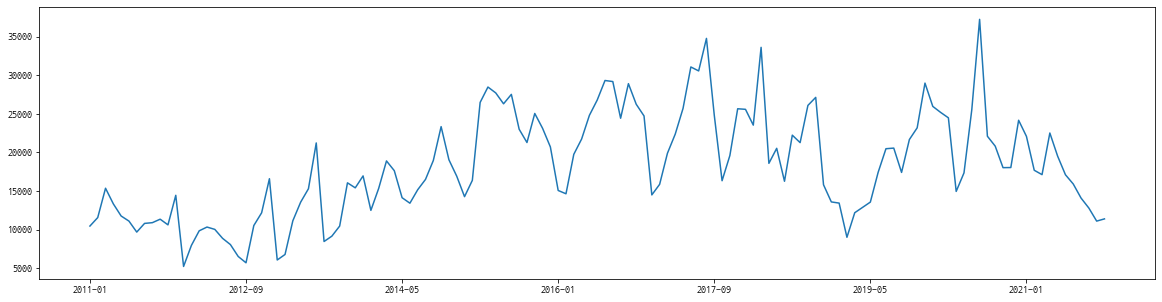

In [ ]:
buy['서울특별시'].plot(kind='line', figsize=(20,5) )

In [ ]:
buy1 = buy
buy1 = buy1.reset_index()
buy1.head()

행정구역,index,서울특별시,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,서울특별시 노원구,서울특별시 은평구,서울특별시 서대문구,서울특별시 마포구,서울특별시 양천구,서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,서울특별시 영등포구,서울특별시 동작구,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구
0,2011-01,10482,145,250,169,288,291,339,391,559,315,368,644,698,360,520,493,526,443,157,329,527,352,577,628,682,431
1,2011-02,11579,170,148,200,368,296,399,360,632,279,456,710,777,413,733,511,724,536,203,366,509,441,477,631,657,583
2,2011-03,15373,201,179,291,488,467,509,657,816,489,625,878,1094,496,829,685,990,680,272,495,622,596,548,667,925,874
3,2011-04,13350,180,156,355,339,408,422,518,689,468,558,667,1062,456,555,635,824,636,267,392,562,501,501,697,789,713
4,2011-05,11780,200,107,324,270,347,379,428,526,419,493,572,978,478,410,585,772,452,223,320,563,461,424,608,670,771


In [ ]:
gen11.head()

,서울특별시,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,서울특별시 노원구,서울특별시 은평구,서울특별시 서대문구,서울특별시 마포구,서울특별시 양천구,서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,서울특별시 영등포구,서울특별시 동작구,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구
시기,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01,1535816,35771,28616,51822,49133,63753,65350,63916,73753,50725,41610,62880,67155,54491,69612,51387,71751,58260,40419,66739,62648,116977,56575,88101,83879,60493
2011-02,1538029,35793,28685,51759,49185,63875,65638,64075,73897,50883,41648,62941,67264,54637,69736,51267,71829,58241,40556,66982,62882,117500,56547,87914,83738,60557
2011-03,1535811,35727,28586,51713,49068,63847,65588,64099,73856,50899,41473,62771,67239,54461,69668,50978,71700,58194,40628,67136,62612,117639,56321,87584,83506,60518
2011-04,1534477,35681,28571,51613,48919,63799,65539,64081,73780,50954,41424,62593,67239,54264,69600,50731,71750,58148,40687,67251,62571,117565,56204,87536,83486,60491
2011-05,1530582,35676,28495,51481,48835,63618,65334,64070,73504,50807,41295,62338,66994,54109,69439,50472,71570,57931,40622,67298,62470,117308,55998,87456,83168,60294


In [ ]:
buy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       131 non-null    object
 1   서울특별시       131 non-null    int64 
 2   서울특별시 종로구   131 non-null    int64 
 3   서울특별시 중구    131 non-null    int64 
 4   서울특별시 용산구   131 non-null    int64 
 5   서울특별시 성동구   131 non-null    int64 
 6   서울특별시 광진구   131 non-null    int64 
 7   서울특별시 동대문구  131 non-null    int64 
 8   서울특별시 중랑구   131 non-null    int64 
 9   서울특별시 성북구   131 non-null    int64 
 10  서울특별시 강북구   131 non-null    int64 
 11  서울특별시 도봉구   131 non-null    int64 
 12  서울특별시 노원구   131 non-null    int64 
 13  서울특별시 은평구   131 non-null    int64 
 14  서울특별시 서대문구  131 non-null    int64 
 15  서울특별시 마포구   131 non-null    int64 
 16  서울특별시 양천구   131 non-null    int64 
 17  서울특별시 강서구   131 non-null    int64 
 18  서울특별시 구로구   131 non-null    int64 
 19  서울특별시 금천구   131 non-null    int64 
 20  서울특별시 영등포구

In [ ]:
buy1.head()

행정구역,index,서울특별시,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,서울특별시 노원구,서울특별시 은평구,서울특별시 서대문구,서울특별시 마포구,서울특별시 양천구,서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,서울특별시 영등포구,서울특별시 동작구,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구
0,2011-01,10482,145,250,169,288,291,339,391,559,315,368,644,698,360,520,493,526,443,157,329,527,352,577,628,682,431
1,2011-02,11579,170,148,200,368,296,399,360,632,279,456,710,777,413,733,511,724,536,203,366,509,441,477,631,657,583
2,2011-03,15373,201,179,291,488,467,509,657,816,489,625,878,1094,496,829,685,990,680,272,495,622,596,548,667,925,874
3,2011-04,13350,180,156,355,339,408,422,518,689,468,558,667,1062,456,555,635,824,636,267,392,562,501,501,697,789,713
4,2011-05,11780,200,107,324,270,347,379,428,526,419,493,572,978,478,410,585,772,452,223,320,563,461,424,608,670,771


In [ ]:
buy1.iloc[:,1:]

행정구역,서울특별시,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,서울특별시 도봉구,서울특별시 노원구,서울특별시 은평구,서울특별시 서대문구,서울특별시 마포구,서울특별시 양천구,서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,서울특별시 영등포구,서울특별시 동작구,서울특별시 관악구,서울특별시 서초구,서울특별시 강남구,서울특별시 송파구,서울특별시 강동구
0,10482,145,250,169,288,291,339,391,559,315,368,644,698,360,520,493,526,443,157,329,527,352,577,628,682,431
1,11579,170,148,200,368,296,399,360,632,279,456,710,777,413,733,511,724,536,203,366,509,441,477,631,657,583
2,15373,201,179,291,488,467,509,657,816,489,625,878,1094,496,829,685,990,680,272,495,622,596,548,667,925,874
3,13350,180,156,355,339,408,422,518,689,468,558,667,1062,456,555,635,824,636,267,392,562,501,501,697,789,713
4,11780,200,107,324,270,347,379,428,526,419,493,572,978,478,410,585,772,452,223,320,563,461,424,608,670,771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,15921,229,369,407,281,410,438,606,638,585,621,624,1486,402,652,520,1138,805,379,514,562,698,603,1044,1464,446
127,14101,187,214,426,262,417,434,461,708,522,571,533,967,421,619,507,866,694,528,425,582,549,1148,818,801,441
128,12808,209,139,379,248,384,338,564,764,458,384,454,888,389,541,472,757,721,357,641,407,513,692,703,650,756
129,11121,232,125,280,257,422,321,603,467,432,459,413,833,404,449,459,690,444,363,569,333,462,420,647,559,478


In [ ]:
buy1.iloc[:,1:] = buy1.iloc[:,1:].apply(pd.to_numeric)
buy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       131 non-null    object
 1   서울특별시       131 non-null    int64 
 2   서울특별시 종로구   131 non-null    int64 
 3   서울특별시 중구    131 non-null    int64 
 4   서울특별시 용산구   131 non-null    int64 
 5   서울특별시 성동구   131 non-null    int64 
 6   서울특별시 광진구   131 non-null    int64 
 7   서울특별시 동대문구  131 non-null    int64 
 8   서울특별시 중랑구   131 non-null    int64 
 9   서울특별시 성북구   131 non-null    int64 
 10  서울특별시 강북구   131 non-null    int64 
 11  서울특별시 도봉구   131 non-null    int64 
 12  서울특별시 노원구   131 non-null    int64 
 13  서울특별시 은평구   131 non-null    int64 
 14  서울특별시 서대문구  131 non-null    int64 
 15  서울특별시 마포구   131 non-null    int64 
 16  서울특별시 양천구   131 non-null    int64 
 17  서울특별시 강서구   131 non-null    int64 
 18  서울특별시 구로구   131 non-null    int64 
 19  서울특별시 금천구   131 non-null    int64 
 20  서울특별시 영등포구

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

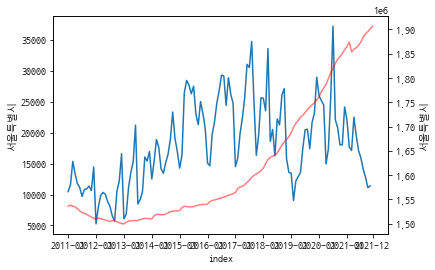

In [ ]:
sns.lineplot( data=buy1, x='index', y='서울특별시')

ax = plt.gca()


xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%12==0:
        xticks[i].set_visible(True)
    else:
       xticks[i].set_visible(False)

ax2 = ax.twinx()
sns.lineplot( data=gen11, x='시기', y='서울특별시', ax=ax2, color='red', alpha=0.5 )

plt.show()





두개의 표를 하나로 합치기 시도

In [ ]:
buy2=buy1.iloc[:,0:2]
buy2.rename(columns={'서울특별시':'부동산거래'},inplace=True)
buy2.rename(columns={'index':'시기'},inplace=True)
buy2=buy2.reset_index(drop=True)
buy2.head()

행정구역,시기,부동산거래
0,2011-01,10482
1,2011-02,11579
2,2011-03,15373
3,2011-04,13350
4,2011-05,11780


In [ ]:
gen112=gen11.iloc[:,0:1]
gen112=gen112.reset_index(drop=True)
gen112.rename(columns={'서울특별시':'1인가구'},inplace=True)
gen112.head()

,1인가구
0,1535816
1,1538029
2,1535811
3,1534477
4,1530582


In [ ]:
gen212=gen21.iloc[:,0:1]
gen212=gen212.reset_index(drop=True)
gen212.rename(columns={'서울특별시':'2인가구'},inplace=True)
gen212.head()

,2인가구
0,778517
1,778801
2,777519
3,777625
4,778185


In [ ]:
gen312=gen31.iloc[:,0:1]
gen312=gen312.reset_index(drop=True)
gen312.rename(columns={'서울특별시':'3인가구'},inplace=True)
gen312.head()

,3인가구
0,774468
1,774651
2,774219
3,774010
4,773345


In [ ]:
gen412=gen41.iloc[:,0:1]
gen412=gen412.reset_index(drop=True)
gen412.rename(columns={'서울특별시':'4인가구'},inplace=True)
gen412.head()

,4인가구
0,864689
1,864396
2,864763
3,864034
4,863770


In [ ]:
final1=pd.concat([buy2,gen112],axis=1)
final2=pd.concat([final1,gen212],axis=1)
final3=pd.concat([final2,gen312],axis=1)
final4=pd.concat([final3,gen412],axis=1)
final4=final4.drop(index=[131])
final4 = final4.set_index('시기')
final4

,부동산거래,1인가구,2인가구,3인가구,4인가구
시기,,,,,
2011-01,10482.0,1535816,778517,774468,864689
2011-02,11579.0,1538029,778801,774651,864396
2011-03,15373.0,1535811,777519,774219,864763
2011-04,13350.0,1534477,777625,774010,864034
2011-05,11780.0,1530582,778185,773345,863770
...,...,...,...,...,...
2021-07,15921.0,1874404,971381,755526,629671
2021-08,14101.0,1884512,973254,755059,626250
2021-09,12808.0,1891036,975759,754121,623625


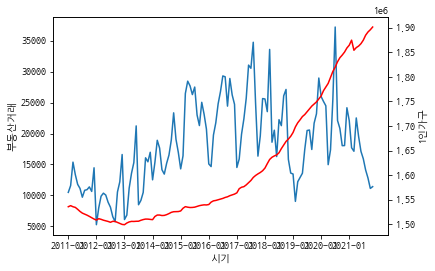

In [ ]:
sns.lineplot( data=final1, x='시기', y='부동산거래')
ax = plt.gca()

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%12==0:
        xticks[i].set_visible(True)
    else:
       xticks[i].set_visible(False)

ax2 = ax.twinx()


sns.lineplot( data=final1, x='시기', y='1인가구', ax=ax2, color='red')

plt.show()

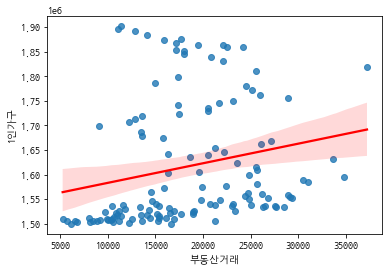

In [ ]:
sns.regplot(data=final1, x='부동산거래', y='1인가구',line_kws={'color':'red'})

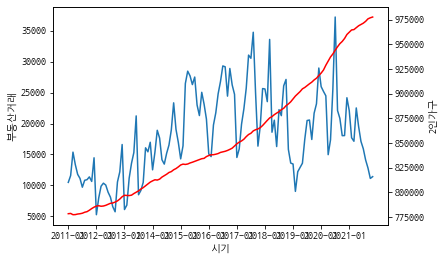

In [ ]:
sns.lineplot( data=final4, x='시기', y='부동산거래')
ax = plt.gca()

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%12==0:
        xticks[i].set_visible(True)
    else:
       xticks[i].set_visible(False)

ax2 = ax.twinx()

sns.lineplot( data=final4, x='시기', y='2인가구', ax=ax2, color='red')

plt.show()

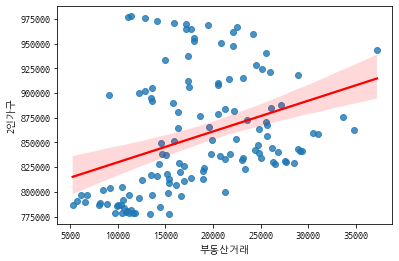

In [ ]:
sns.regplot(data=final4, x='부동산거래', y='2인가구',line_kws={'color':'red'})

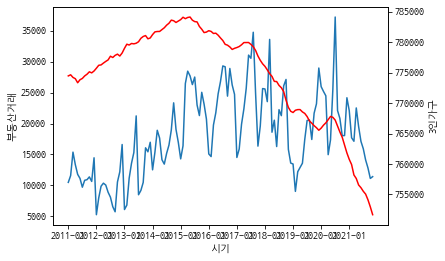

In [ ]:
sns.lineplot( data=final4, x='시기', y='부동산거래')
ax = plt.gca()

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%12==0:
        xticks[i].set_visible(True)
    else:
       xticks[i].set_visible(False)

ax2 = ax.twinx()


sns.lineplot( data=final4, x='시기', y='3인가구', ax=ax2, color='red')

plt.show()

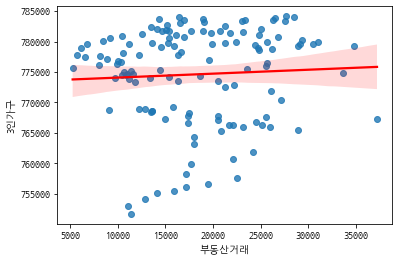

In [ ]:
sns.regplot(data=final4, x='부동산거래', y='3인가구',line_kws={'color':'red'})

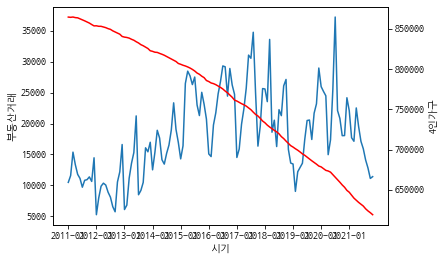

In [ ]:
sns.lineplot( data=final4, x='시기', y='부동산거래')
ax = plt.gca()

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%12==0:
        xticks[i].set_visible(True)
    else:
       xticks[i].set_visible(False)

ax2 = ax.twinx()

sns.lineplot( data=final4, x='시기', y='4인가구', ax=ax2, color='red')
plt.show()

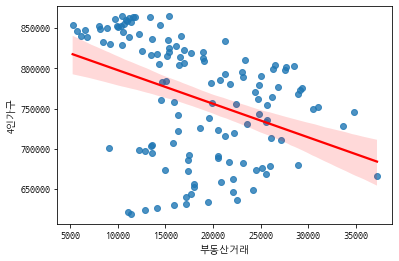

In [ ]:
sns.regplot(data=final4, x='부동산거래', y='4인가구',line_kws={'color':'red'})

In [ ]:
final4[['부동산거래', '1인가구','2인가구','3인가구','4인가구']].corr()

,부동산거래,1인가구,2인가구,3인가구,4인가구
부동산거래,1.000000,0.217238,0.356235,0.055075,-0.385248
1인가구,0.217238,1.000000,0.968346,-0.919147,-0.949013
2인가구,0.356235,0.968346,1.000000,-0.813136,-0.994101
3인가구,0.055075,-0.919147,-0.813136,1.000000,0.790788
4인가구,-0.385248,-0.949013,-0.994101,0.790788,1.000000


### 결론
- 부동산거래량과 가구 수는 큰 연관성은 없음
- 하지만 2인가구와 4인가구에서는 각각 0.36, -0.39로 어느정도 상관관계를 갖고 있음
- 1인 가구와의 상관계수도 0.22로 아예 관계가 없진 않지만 상관관계는 미미하다고 보여짐
- 산점도를 확인해보면, 2인 가구의 수는 클수록 부동산 거래량 데이터가 많아지는 추세를 보이고, 4인 가구의 수는 적을수록 부동산 거래량이 많아짐

## 3-2. 인구 증감
- 기간 : 2011년 1월 - 2021년 8월
- 가설 : 인구가 감소할 수록 부동산 거래량도 줄어들 것이다.

In [ ]:
population = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/가공완료/인구이동(가공한것).csv의 사본')
population

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2011-01,-4324,-1972,-289,1657,961,183,416,-,8220,-1223,551,129,-591,-1808,-1786,-84,-40
1,2011-02,-3597,-785,-510,2393,1262,738,-295,-,6922,-1159,696,825,-731,-2913,-1790,-1274,218
2,2011-03,-10861,-2361,-1815,2342,-600,104,-19,-,7354,1898,599,2897,-183,-112,64,394,299
3,2011-04,-10056,-2641,-1278,2222,-198,46,52,-,5539,1608,958,1907,38,-403,572,1413,221
4,2011-05,-10320,-836,-807,2091,170,502,-89,-,6272,-5,612,1873,294,-247,298,-111,303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2021-04,-9738,-2085,-2291,-132,-743,-828,-1140,721,12600,540,882,1180,-519,232,1133,-348,536
124,2021-05,-8309,-1525,-2391,227,-580,-517,-1093,449,9322,892,954,1253,260,-10,1327,-687,428
125,2021-06,-8288,-1781,-2154,131,-361,-1126,-900,769,10603,718,1150,956,401,-507,606,-624,407
126,2021-07,-8429,-2096,-1749,1012,-226,-848,-753,1137,10591,922,231,1034,-15,-587,-82,-701,559


In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      128 non-null    object
 1   서울      128 non-null    int64 
 2   부산      128 non-null    int64 
 3   대구      128 non-null    int64 
 4   인천      128 non-null    int64 
 5   광주      128 non-null    int64 
 6   대전      128 non-null    int64 
 7   울산      128 non-null    int64 
 8   세종      128 non-null    object
 9   경기      128 non-null    int64 
 10  강원      128 non-null    int64 
 11  충북      128 non-null    int64 
 12  충남      128 non-null    int64 
 13  전북      128 non-null    int64 
 14  전남      128 non-null    int64 
 15  경북      128 non-null    int64 
 16  경남      128 non-null    int64 
 17  제주      128 non-null    int64 
dtypes: int64(16), object(2)
memory usage: 18.1+ KB


In [ ]:
population2=population.iloc[:,1:2]
population2.rename(columns={'서울':'인구이동'},inplace=True)
population2.head()

,인구이동
0,-4324
1,-3597
2,-10861
3,-10056
4,-10320


In [ ]:
population2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      128 non-null    object
 1   인구이동    128 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [ ]:
buy2.head()

행정구역,시기,부동산거래
0,2011-01,10482
1,2011-02,11579
2,2011-03,15373
3,2011-04,13350
4,2011-05,11780


In [ ]:
final_population=pd.concat([buy2,population2],axis=1)
final_population=final_population.drop(index=[130])
final_population=final_population.drop(index=[129])
final_population=final_population.drop(index=[128])
final_population=final_population.set_index('시기')
final_population

,부동산거래,인구이동
시기,,
2011-01,10482,-4324.0
2011-02,11579,-3597.0
2011-03,15373,-10861.0
2011-04,13350,-10056.0
2011-05,11780,-10320.0
...,...,...
2021-04,22519,-9738.0
2021-05,19519,-8309.0
2021-06,17117,-8288.0


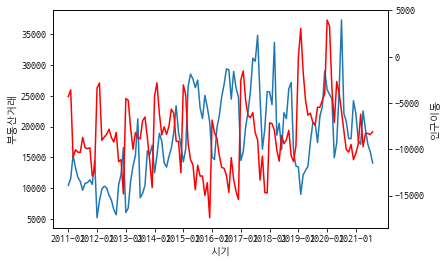

In [ ]:
sns.lineplot( data=final_population, x='시기', y='부동산거래')
ax = plt.gca()

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%12==0:
        xticks[i].set_visible(True)
    else:
       xticks[i].set_visible(False)

ax2 = ax.twinx()


sns.lineplot( data=final_population, x='시기', y='인구이동', ax=ax2, color='red')

plt.show()

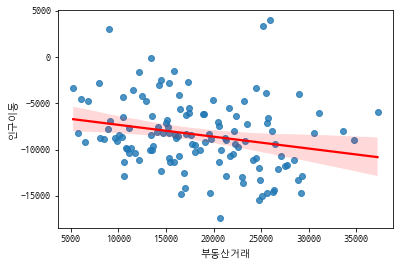

In [ ]:
sns.regplot(data=final_population, x='부동산거래', y='인구이동',line_kws={'color':'red'})

In [ ]:
final_population[['부동산거래', '인구이동']].corr()

,부동산거래,인구이동
부동산거래,1.000000,-0.227272
인구이동,-0.227272,1.000000


### 결론
- 상관계수 값은 -0.23으로 약한 음의 상관관계를 갖는다고 볼 수 있음
- 처음에 설정한 가설은 기각.
- 상관계수는 있으나, 산전도 그래프에서 인구이동이 상대적으로 늘수록 부동산거래량이 적어지는 추세가 뚜렷히 보이진 않음

# 4. 주택구입물량지수